In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [181]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
)
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings("ignore")

Support Vector Machine

Data si zobrazíme jako bodový graf. Když se podíváme na graf níže, bylo by teoreticky možné oba druhy kostatců oddělit. Navíc by toto mělo být možné s využitím lineární funkce (přímky). Právě v tom spočívá princip metody Support Vector Machine (SVM) - rozdělí prostor na dvě části s využitím lineární funkce. Metoda nakreslí hranici tak, aby vzdálenost od nejbližších bodů z k hranici byla z obou stran co největší.

Jestliže je možné data kompletně oddělit, označujeme je jako lineárně oddělitelná (linearly separable).

In [182]:
data = pd.read_csv("IRIS.csv")
#data["species"].uniques()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

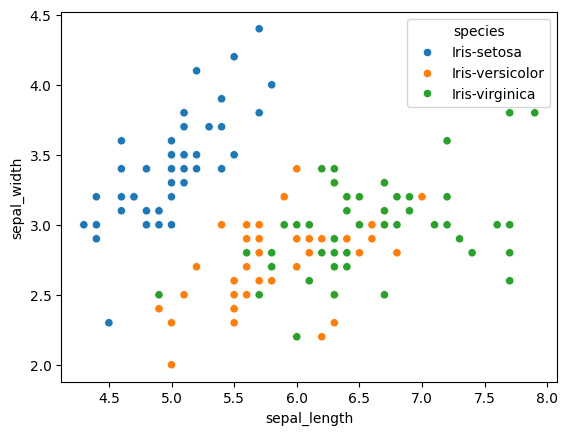

In [183]:
sns.scatterplot(data,x = "sepal_length", y = "sepal_width", hue = "species")

In [184]:
data.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 147, dtype: int64

In [185]:
data["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [186]:
data = data[data["species"].isin(['Iris-setosa', 'Iris-versicolor'])] 
# vyberu jen 2

In [187]:
data = data[["sepal_length", "sepal_width", "species"]]

In [188]:
data.head()

,sepal_length,sepal_width,species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

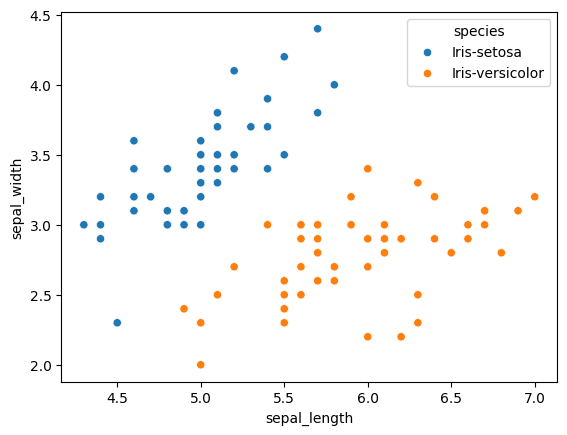

In [189]:
sns.scatterplot(data,x = "sepal_length", y = "sepal_width", hue = "species")
#hue = abychom věděli, rozdělit podle species - obarví se 

Opět použijeme modul scikit-learn. V tomto případě jako klasifikátor využijeme LinearSVC(). Pouze s tím rozdílem, že jako klasifikátor využijeme LinearSVC.

In [190]:
X = data.drop(columns=["species"]) #pomocí těch budeme predikovat
y = data["species"] # to, co budeme predikovat

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42   #abychom když použijeme podruhé, měli stejné výsledky
)
scaler = StandardScaler() #nominální
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#dělám klasifikaci - proto Support Vector Classification 
#linear, dělám to v jedné rovině, nedělám s tím žádné další věci
clf = LinearSVC() # Trénování modelu  Suport Vector Machine 
clf.fit(X_train, y_train) #chceme je natrénovat, nakresli tu hranici
y_pred = clf.predict(X_test) # pro ty testovací data predikuj, co si algoritmus myslí, co predikuje

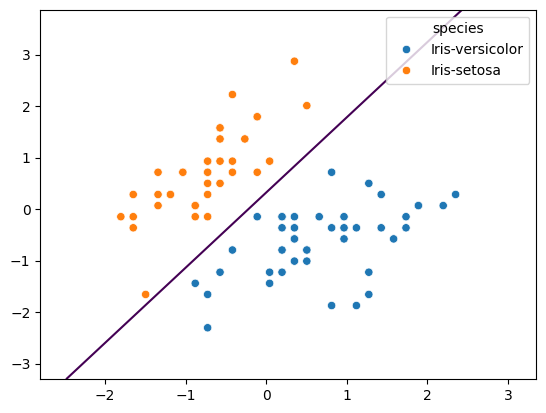

In [191]:
ax = sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
# X_train[:,0] po transformaci je průměr v obou dvou případech 0  - vezme průměr, odečte ho od té hodnoty a pak ho vydělí variabilitou
DecisionBoundaryDisplay.from_estimator(clf, X_train, ax=ax, plot_method="contour", levels=[0])
# DecisionBoundaryDisplay tím získám čátu, použiju metodu from_estimator, dávám tomu trénovací data,
# dávám tomu odkaz na ten graf

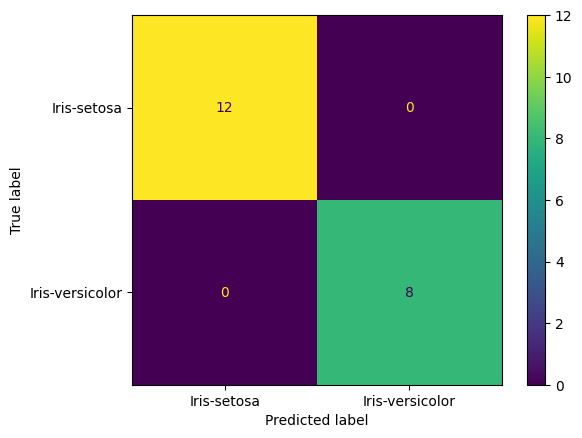

In [192]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
)

Jestliže jsou data lineárně oddělitelná, označujeme hranici mezi nimi jako hard margin. Pokud data není možné lineárně oddělit, hranice mezi nimi se označuje jako soft margin. V takovém případě se algoritmus snaží nakreslit hranici tak, aby co nejvíce bodů bylo ve "správné" nadrovině a aby body ve "špatné" nadrovině byly co nejblíže hranici. Funkce, která toto měří, se označuje jako hinge loss. Při kreslení soft margin jsou vyvažována dvě kritéria - šířka marginu a množství nesprávně klasifikovaných bodů. Funkce jsou vyvačovány pomocí deep parameter C.

### Klasidikace do více než dvou tříd

V řadě případů potřebujeme rozdělovat data do více než dvou tříd. Například pacienty můžeme rozdělovat dle stádia jejich nemoci (tj. nerozlišujeme jen zdravé a nemocné pacienty, ale pacienty zdravé, v počátečním a pokročilém stádiu nemoci), v dopravě můžeme klasifikovat několik typů vozidel (např. osobní automobil, nákladní automobil, autobus, traktor, motocykl atd.), zákaznické recence můžeme rozlišovat na pozitivní, neutrální a negativní atd.

Klasifikaci do více tříd můžeme provádět více způsoby. Jedním z nich je "přímé" řešení, tj. pracujeme od začátku do konce s klasifikací do více tříd. Takový přístup využívá například algoritmus K Nearest Neighbors (KNN) nebo rozhodovací strom.

Druhým z přístupů je převed úlohy s více třídami na problém dvou tříd, tedy binární klasifikaci. Takto postupuje algoritmus SVM. Tento postup je dále možné provádět dvěma různými způsoby:

- Prvním z nich je varianta "jeden proti všem" (**One-to-Rest**). Při jeho použití algoritmus vytvoří tolik klasifikátorů, kolik máme tříd, a trénuje každý jako **binární klasifikaci jedné třidy oproti všem ostatním**. Při predikci každý z klasifikátorů předpoví buď "svojí" třídu, nebo "ostatní třídy". Pokud bychom například rozdělovali data do tří skupin, vytvoří tento postup tři klasifikátory.
- Druhou z možností je "jeden proti jednomu" (**One-to-One**). Při jeho použití algoritmus vytvoří klasifikátor pro každou dvojici tříd. Každý klasifikátor porovnává dvě třídy a data z ostatních tříd jsou ignorována.

Data najdete [zde](Dry_Bean_Dataset.csv)

Zdroj dat: https://data.world/makeovermonday/2021w14

In [193]:
data = pd.read_csv("Dry_Bean_Dataset.csv")
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,70522,1054.957,368.156404,244.520009,1.505629,0.747578,71668,299.652130,0.729883,0.984010,0.796278,0.813926,0.005220,0.001413,0.662476,0.997443,BARBUNYA
1,70692,1006.430,378.574466,238.177906,1.589461,0.777289,71443,300.013083,0.787865,0.989488,0.877027,0.792481,0.005355,0.001303,0.628026,0.998223,BARBUNYA
2,67533,997.712,358.146303,241.279504,1.484363,0.739014,68874,293.233160,0.747377,0.980530,0.852541,0.818752,0.005303,0.001470,0.670356,0.995051,BARBUNYA
3,105542,1265.623,466.135980,288.999342,1.612931,0.784610,107112,366.579116,0.747888,0.985342,0.827993,0.786421,0.004417,0.001042,0.618458,0.997530,BARBUNYA
4,67454,1014.674,343.989033,249.988996,1.376017,0.686918,68666,293.061598,0.731677,0.982349,0.823312,0.851950,0.005100,0.001657,0.725820,0.998740,BARBUNYA


In [194]:
X = data.drop(columns=["Class"]) #všechno kromě té třídy
y = data["Class"] # tu třídu
y.value_counts()

BARBUNYA    100
CALI        100
HOROZ       100
Name: Class, dtype: int64

Rozdělíme data na trénovací a testovací sadu.

Parametr stratify určuje, podle jakého sloupce chceme zachovat poměr hodnot. V našem případě chceme zachovat poměr tříd (aby v trénovacích i testovacích datech byly třídy podobně zastoupené).

In [195]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [196]:
scaler = StandardScaler() #zajistí mi ufektivnější nalezení údajů, tohle je ta standardizace
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(kernel="linear", decision_function_shape="ovr", random_state=42)
# jen SVC - chci si vybrat, jestli one_to_rest nebo one_to_one 
clf.fit(X_train, y_train) # provádím trénování, bude kreslit ty čáry a budu mít víc různých skupin
y_pred = clf.predict(X_test)

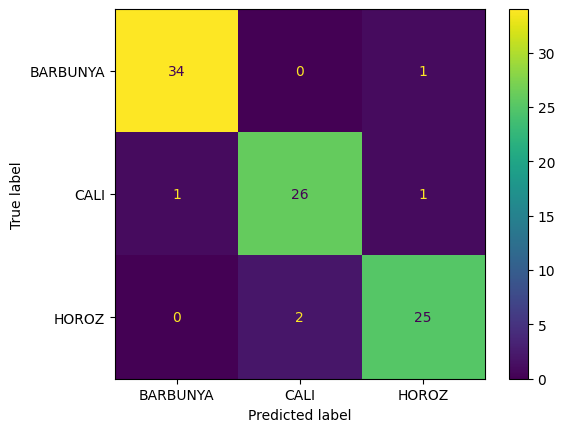

In [197]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
# vodorovné - co ten model predikoval
# svislé - co je ten pravdivý výsledek

Jak vyhodnocujeme klasifikaci do více tříd?

Podíváme se, jak vypadá chybová matice pro více tříd. Funguje na stejném principu, jen je větší, a není na první pohled jasné, jak spočítat metriky jako precision nebo recall. Všimněme si ale, že základní metriky accuracy je stejná: Součet hodnot na diagonále (součet správně určených bodů) oproti velikosti datasetu.

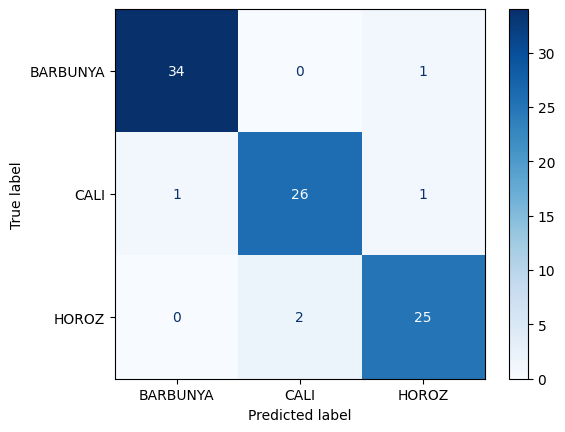

In [198]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
)

Nyní můžeme vyhodnotit přesnost. Využijeme metriku accuracy_score, která poměřuje počet správně označených testovacích dat oproti celkovému množství testovacích dat.

In [199]:
print(accuracy_score(y_test, y_pred))

0.9444444444444444


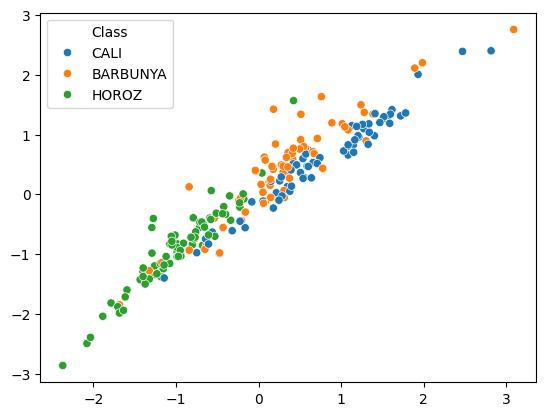

In [227]:
# Testík (jen pro mě), - zkouška nelinearniho kernel na fazole (3 druhy)
data = pd.read_csv("Dry_Bean_Dataset.csv")
X = data.drop(columns=["Class"]) #všechno kromě té třídy
y = data["Class"] # tu třídu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
scaler = StandardScaler() #zajistí mi ufektivnější nalezení údajů, tohle je ta standardizace
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(kernel="rbf",decision_function_shape="ovo", random_state=42)
#jen SVC - chci si vybrat, jestli one_to_rest nebo one_to_one 
clf.fit(X_train, y_train) # provádím trénování, bude kreslit ty čáry a budu mít víc různých skupin
y_pred = clf.predict(X_test)

ax = sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
#DecisionBoundaryDisplay.from_estimator(clf, X_train, ax=ax, plot_method="contour", levels=[3])

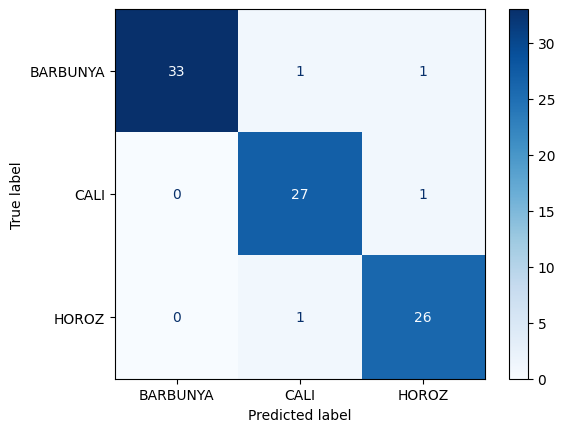

In [230]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,cmap=plt.cm.Blues)

In [217]:
data["Class"].value_counts()

BARBUNYA    100
CALI        100
HOROZ       100
Name: Class, dtype: int64

In [220]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,70522,1054.957,368.156404,244.520009,1.505629,0.747578,71668,299.652130,0.729883,0.984010,0.796278,0.813926,0.005220,0.001413,0.662476,0.997443,BARBUNYA
1,70692,1006.430,378.574466,238.177906,1.589461,0.777289,71443,300.013083,0.787865,0.989488,0.877027,0.792481,0.005355,0.001303,0.628026,0.998223,BARBUNYA
2,67533,997.712,358.146303,241.279504,1.484363,0.739014,68874,293.233160,0.747377,0.980530,0.852541,0.818752,0.005303,0.001470,0.670356,0.995051,BARBUNYA
3,105542,1265.623,466.135980,288.999342,1.612931,0.784610,107112,366.579116,0.747888,0.985342,0.827993,0.786421,0.004417,0.001042,0.618458,0.997530,BARBUNYA
4,67454,1014.674,343.989033,249.988996,1.376017,0.686918,68666,293.061598,0.731677,0.982349,0.823312,0.851950,0.005100,0.001657,0.725820,0.998740,BARBUNYA


In [173]:
data = pd.read_csv("Dry_Bean_Dataset.csv")
X = data.drop(columns=["Class"]) #všechno kromě té třídy
X = data[["sepal_length", "sepal_width", "species"]]

y = data["Class"] # tu třídu

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler() #zajistí mi ufektivnější nalezení údajů, tohle je ta standardizace
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

strategies = ["ovo","ovr"] #ovo - one to one, # one to rest 

for item in strategies:
    clf = SVC(kernel="linear", decision_function_shape=item, random_state=42)
    # jen SVC - chci si vybrat, jestli one_to_rest nebo one_to_one 
    clf.fit(X_train, y_train) # provádím trénování, bude kreslit ty čáry a budu mít víc různých skupin
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f"{item}:{accuracy}")

ovo:0.9444444444444444
ovr:0.9444444444444444


In [174]:
# vychází to stejně 


In [175]:
# používám KNN 

k = range(1,30)
accuracy_list = []

for item in k:
    clf = KNeighborsClassifier(n_neighbors=item)
    clf.fit(X_train, y_train) # provádím trénování
    y_pred = clf.predict(X_test) # vypočítám si predikce 
    accuracy = accuracy_score(y_test,y_pred) # vypočítám accuracy
    accuracy_list.append([item,accuracy])
    #print(f"{item}:{accuracy}")
accuracy_list = pd.DataFrame(accuracy_list,columns=["n","accuracy"])
accuracy_list.sort_values("accuracy",ascending=False)

,n,accuracy
13,14,0.955556
12,13,0.944444
2,3,0.944444
17,18,0.944444
16,17,0.944444
15,16,0.944444
1,2,0.944444
9,10,0.944444
14,15,0.933333
19,20,0.933333


## Křížová validace a Grid Search

Ukazázali jsme si, že na trénování modelu může mít vliv hodnota jeho některého parametru. Například u algoritmu K Nearest Neighbors jsme zkoušeli nastavit různé hodnoty parametru `n_neighbors` pomocí for cyklu. Když bychom parametrů měli víc, můžeme použít vnořený for cyklus, ale brzy by se nám výsledky špatně porovnávaly. V knihovně `scikit-learn` existuje třída `GridSearchCV`, která nejlepší nastavení parametrů zjistí za nás.

`GridSearchCV` provádí tvz. křížovou validaci (*cross validation*). To znamená, že nerozděluje data na trénovací a testovací pouze jednou, ale vícekrát (ve výchozím nastavení celkem pětkrát). Tím se snaží předejít problému s *overfitting*, o kterém si povíme v dalších lekcích.

`GridSearchCV` tedy postupuje takto:

- pro každý ze zadaných hodnot parametrů provede několik rozdělení na trénovací a testovací data (*split*),
- pro každé rozdělení dat provede trénování modelu a zjistí hodnotu požadované metriky,
- vypočítá průměr zjištěné metriky pro všechna rozdělení dat.

Na základě průměrů metrik pro jednotlivá rozdělení pak vybere nejlepší metriku. Model tedy již není závislý na tom, jak rozdělíme data na testovací a trénovací část.

Výhoda tohoto přístupu je, že nevyžaduje tolik dat ("recykluje" totiž data, která máme k dispozici). Nevýhodou může být časová náročnost, a to zvlášť v případě, že prohledáváme hodně různých parametrů. Další výhodou je, že pomáhá zabránit jevu označovanému jako **overfitting**. Overfitting je situace, kdy je nějaký model dává velice přesné výsledky pro určité trénovací a testovací data, ale špatné výsledky pro nová data. Takový model je příliš zaměřený na specifika testovacích a trénovacích dat a špatně si pak poradí s novými daty.

Alternativou ke `GridSearchCV` je `RandomizedSearchCV`, který nevyhodnocuje všechny kombinace parametrů, ale jen náhodně vygenerovanou podskupinu. Tím pádem je rychlejší, protože nemusí provádět tolik výpočetních operací. Na druhou stranu to ale znamená, že nemusí najít tak dobrou kombinaci parametrů jako`GridSearchCV`.

!["81Yoo.png"](81Yoo.png)

Nakonec porovnáme výsledky algoritmu K Nearest Neighbors se Support Vector Machine. Tentokrát využijeme jako klasifikátor `SVC`. Zůstaneme u lineární verze, to zajistíme nastavením `kernel="linear"`. Klasifikátor `SVC` nám ale umožní vyzkoušet strategii jeden proti všem i jeden proti jednomu. Pomocí `GridSearchCV` se podíváme, která strategie vede k lepšímu výsledku.

In [178]:
model_1 = SVC(kernel="linear")
params_1 = {"decision_function_shape": ["ovo", "ovr"]}

scaler = StandardScaler()
X_fit = scaler.fit_transform(X)

clf_1 = GridSearchCV(model_1, params_1, scoring="accuracy")
clf_1.fit(X_fit, y)

print(clf_1.best_params_)
print(round(clf_1.best_score_, 2))

{'decision_function_shape': 'ovo'}
0.95


In [179]:
model_2 = KNeighborsClassifier()
params_2 = {"n_neighbors": range(1, 31, 2)}

clf_2 = GridSearchCV(model_2, params_2, scoring="accuracy")
clf_2.fit(X_fit, y)

print(clf_2.best_params_)
print(round(clf_2.best_score_, 2))

{'n_neighbors': 23}
0.95


In [56]:
# cvičení

In [84]:
# Načtení dat z CSV souboru
data = pd.read_csv("IRIS.csv")
data["species"].unique()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
data = data[data["species"].isin(['Iris-setosa', 'Iris-versicolor','Iris-virginica'])] 

In [86]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
#data = data[["sepal_length", "sepal_width", "species"]]

In [88]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Rozdělení dat na vstupní (X) a cílové (y) proměnné
X = data.drop(columns=["species"]) #pomocí těch budeme predikovat
y = data["species"] # to, co budeme predikovat 

# Rozdělení dat na trénovací a testovací sadu (30% dat je testovací sada)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42   #abychom když použijeme podruhé, měli stejné výsledky
)
# Standardizace vstupních proměnných
scaler = StandardScaler() #nominální
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Iterace přes různé hodnoty počtu sousedů (k) pro K Nearest Neighborss
#KNN
k = range(1,30)
accuracy_list = []
for item in k:
    clf = KNeighborsClassifier(n_neighbors=item) # Vytvoření klasifikátoru KNN s n sousedy
    clf.fit(X_train, y_train) # Provádím trénování na trénovacích datech
    y_pred = clf.predict(X_test) # Predikce na testovacích datech
    accuracy = accuracy_score(y_test,y_pred)  # Výpočet přesnosti predikce
   # Uložení hodnoty k a příslušné přesnosti
    accuracy_list.append([item, accuracy])
# Vytvoření dataframe s hodnotami k a jejich přesností
accuracy_df = pd.DataFrame(accuracy_list, columns=["n", "accuracy"])
# Seřazení výsledků podle přesnosti v sestupném pořadí
accuracy_df.sort_values("accuracy", ascending=False)

,n,accuracy
14,15,1.000000
20,21,1.000000
18,19,1.000000
21,22,1.000000
16,17,1.000000
15,16,1.000000
22,23,1.000000
13,14,1.000000
12,13,1.000000
11,12,1.000000


In [9]:
data = pd.read_csv("IRIS.csv")
X = data.drop(columns=["species"]) #pomocí těch budeme predikovat
y = data["species"] # to, co budeme predikovat

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42   #abychom když použijeme podruhé, měli stejné výsledky
)
scaler = StandardScaler() #nominální
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#SVM linear classification
k = range(1,30)
for item in k:
    clf = SVC(kernel="linear")
    clf.fit(X_train, y_train) # provádím trénování
    y_pred = clf.predict(X_test) # vypočítám si predikce 
    accuracy = accuracy_score(y_test,y_pred) # vypočítám accuracy
    print(f"{item}:{accuracy}")


1:0.9777777777777777
2:0.9777777777777777
3:0.9777777777777777
4:0.9777777777777777
5:0.9777777777777777
6:0.9777777777777777
7:0.9777777777777777
8:0.9777777777777777
9:0.9777777777777777
10:0.9777777777777777
11:0.9777777777777777
12:0.9777777777777777
13:0.9777777777777777
14:0.9777777777777777
15:0.9777777777777777
16:0.9777777777777777
17:0.9777777777777777
18:0.9777777777777777
19:0.9777777777777777
20:0.9777777777777777
21:0.9777777777777777
22:0.9777777777777777
23:0.9777777777777777
24:0.9777777777777777
25:0.9777777777777777
26:0.9777777777777777
27:0.9777777777777777
28:0.9777777777777777
29:0.9777777777777777


In [16]:
X = data.drop(columns=["species"]) #pomocí těch budeme predikovat
y = data["species"] # to, co budeme predikovat

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42   #abychom když použijeme podruhé, měli stejné výsledky
)
scaler = StandardScaler() #nominální
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

results = []

#SVM with one vs one, one vs rest
strategies = ["ovo","ovr"] 
for strategy in strategies:
    clf = SVC(kernel="rbf", decision_function_shape=strategy, random_state=42)
    clf.fit(X_train, y_train) # provádím trénování
    y_pred = clf.predict(X_test) # vypočítám si predikce 
    accuracy = accuracy_score(y_test,y_pred) # vypočítám accuracy
    results.append([strategy,accuracy])
    #print(f"{item}:{accuracy}")
results_data = pd.DataFrame(results,columns=["Strategy","Accuracy"])
results_data = results_data.sort_values("Accuracy",ascending=False)
results_data

,Strategy,Accuracy
0,ovo,1.0
1,ovr,1.0


In [14]:
X = data.drop(columns=["species"]) #pomocí těch budeme predikovat
y = data["species"] # to, co budeme predikovat

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42   #abychom když použijeme podruhé, měli stejné výsledky
)
scaler = StandardScaler() #nominální
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#SVM with one vs one, one vs rest
# decision_function_shape je linearni i nelinearni(rbf)
# Definování jader a strategií rozhodování pro Support Vector Classifier (SVC)
strategies = ["ovo","ovr"] 
kernels = ["linear","rbf"]
# Vytvoření seznamu pro ukládání kombinací jader a strategií
results = []
for kernel in kernels:
    for strategy in strategies:
        clf = SVC(kernel=kernel, decision_function_shape=strategy, random_state=42) # Vytvoření modelu SVC s daným jádrem a strategií
        clf.fit(X_train, y_train) # provádím trénování na trénovací sadě
        y_pred = clf.predict(X_test) # Predikce na testovací sadě
        accuracy = accuracy_score(y_test,y_pred) # vypočítám accuracy predikce
        #print(f"{item}:{accuracy}")
        results.append([kernel, strategy, accuracy])

results_df = pd.DataFrame(results,columns=["Kernel","Strategy","Accuracy"])
results_df = results_df.sort_values("Accuracy", ascending = False)

results_df


,Kernel,Strategy,Accuracy
2,rbf,ovo,1.000000
3,rbf,ovr,1.000000
0,linear,ovo,0.977778
1,linear,ovr,0.977778


# Predictive maintenance
## Bonus: Poruchy

Stáhni si data o poruchách ze souboru [predictive_maintenance.csv](predictive_maintenance.csv). Význam sloupců je následující:

- UID: jedinečný identifikátor v rozsahu 1 až 10000,
- ID produktu: skládá se z písmene L, M nebo H pro nízkou (50 % všech výrobků), střední (30 %) a vysokou (20 %) variantu kvality výrobku a sériového čísla specifického pro danou variantu,
- teplota vzduchu (K),
- teplota procesu (K),
- otáčky (ot/min),
- točivý moment (Nm),
- opotřebení nástroje (min),
- označení "selhání stroje" (pokud k němu došlo).

Tvým úkolem je vytvořit model, který bude predikovat poruchu stroje.

Proveď následující postup:

- Vyřaď z datasetu sloupce (jsou dva), které nemají pro analýzu význam.
- Podívej se, kolik typů poruch bylo objeveno.
- Rozděl data na vstupní proměnné a výstupní proměnnou.
- Vyzkoušej algoritmy Support Vector Machine a K Nearest Neighbors ke klasifikaci poruchy stroje. Porovnej, který algoritmus dosáhl lepších výsledků. Pozor na to, že dat je nyní opravdu hodně, takže program může běžet trochu déle. Můžeš ho zrychlit tím, že pro K Nearest Neighbors budeš uvažovat pouze čtveřici možných počtů sousedů (např. 3, 5, 11, 15).

Řešení příkladu je [zde](reseni.ipynb).

In [144]:
data = pd.read_csv("predictive_maintenance.csv")

In [145]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [146]:
data = data.drop(columns=["UDI","Product ID","Target"]) #všechno kromě té třídy
#y = data["Class"] # tu třídu
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


In [147]:
data[["Failure Type"]].value_counts()

Failure Type            
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
dtype: int64

In [148]:
data = data.drop(data[data["Failure Type"]=="Random Failures"].index)
# vyřazuji random failures

In [149]:
data[["Failure Type"]].value_counts()

Failure Type            
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
dtype: int64

In [150]:
X = data.drop(columns=["Failure Type"]) #pomocí těch budeme predikovat
y = data["Failure Type"] # to, co budeme predikovat

In [151]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14
9996,H,298.9,308.4,1632,31.8,17
9997,M,299.0,308.6,1645,33.4,22
9998,H,299.0,308.7,1408,48.5,25


In [152]:
y

0       No Failure
1       No Failure
2       No Failure
3       No Failure
4       No Failure
           ...    
9995    No Failure
9996    No Failure
9997    No Failure
9998    No Failure
9999    No Failure
Name: Failure Type, Length: 9982, dtype: object

In [153]:
X_type = pd.get_dummies(X["Type"])
X = pd.merge(X,X_type,left_index=True, right_index=True)
X = X.drop(columns=["Type"])
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1
9996,298.9,308.4,1632,31.8,17,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1
9998,299.0,308.7,1408,48.5,25,1,0,0


- Vyzkoušej algoritmy Support Vector Machine a K Nearest Neighbors ke klasifikaci poruchy stroje. Porovnej, který algoritmus dosáhl lepších výsledků. Pozor na to, že dat je nyní opravdu hodně, takže program může běžet trochu déle. Můžeš ho zrychlit tím, že pro K Nearest Neighbors budeš uvažovat pouze čtveřici možných počtů sousedů (např. 3, 5, 11, 15).

In [154]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42   #abychom když použijeme podruhé, měli stejné výsledky
)
scaler = StandardScaler() #nominální
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



k = [3,5,11,15]
seznam = []

model_2 = KNeighborsClassifier()
params_2 = {"n_neighbors":[3,5,11,15]}

clf_2 = GridSearchCV(model_2, params_2, scoring="accuracy")
clf_2.fit(X_fit, y)

print(clf_2.best_params_)
print(round(clf_2.best_score_, 2))

{'n_neighbors': 3}
0.99
